# **<font size=4 color=#BB3D00 face=微软雅黑>样本自相关的置信区间</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/confidence-intervals-for-sample-autocorrelation.html     
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例：如何为白噪声过程的自相关序列创建置信区间</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：如何为白噪声过程的自相关序列创建置信区间</font>

创建长度为 L=1000 个采样点的白噪声过程的实现。计算最大滞后为 20 的样本自相关。绘制白噪声过程的样本自相关和大约 95% 的置信区间。
创建白噪声随机向量。采用随机数生成器的默认设置，以获得可重现的结果。求出最大滞后为 20 的归一化样本自相关。

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import erfinv

In [ ]:
L = 1000
x = np.random.randn(L)

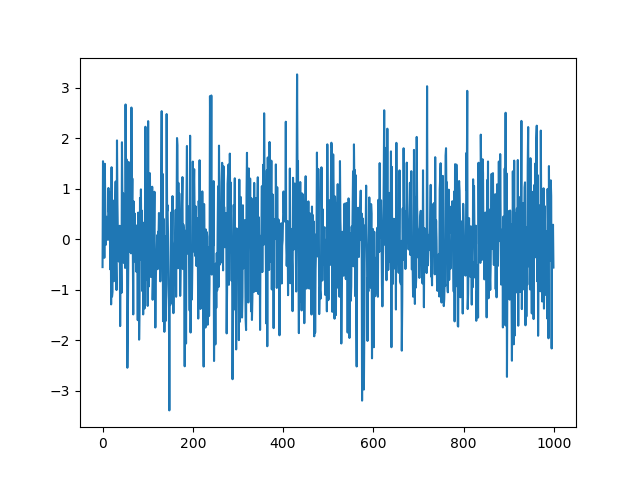

In [ ]:
plt.plot(x)
plt.show()

In [ ]:
def autocorrelation(x, lags):
    n = len(x)
    x = np.array(x)
    result = [np.correlate(x[i:],x[:n-i])\
            /(x[i:].std()*x[:n-i].std()*(n-i)) for i in range(0, lags+1)]
    lag = np.arange(0, lags+1, 1)
    return result, lag

In [ ]:
xc, lags = autocorrelation(x, 20)

为正态分布 N(0,1/L) 创建 95% 的上、下置信边界，其标准差为 1/√L。对于 95% 置信区间，临界值是 √2erf<sup>−1</sup>(0.95)≈1.96，置信区间是Δ=0±1.96/√L.

In [ ]:
vcrit = np.sqrt(2)*erfinv(0.95)
print(vcrit)

1.9599639845400545


In [ ]:
lconf = -vcrit/np.sqrt(L)
hconf = vcrit/np.sqrt(L)

In [ ]:
lline = lconf * np.ones(len(lags))
hline = hconf * np.ones(len(lags))

绘制样本自相关和 95% 置信区间。

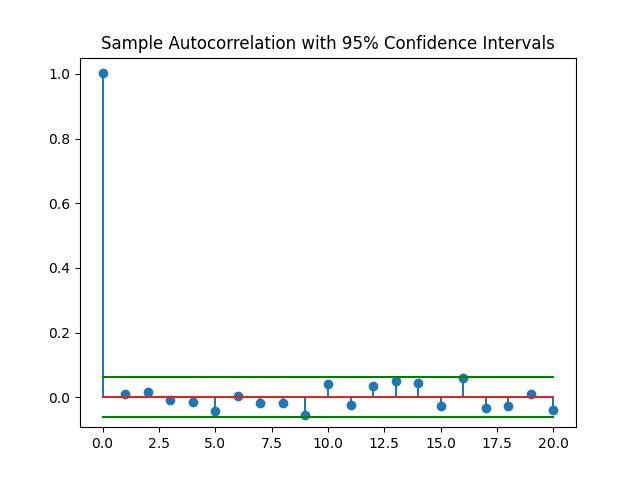

In [ ]:
plt.stem(lags, xc, 'o')
plt.plot(lags, lline, 'g')
plt.plot(lags, hline, 'g')
plt.ylim([lconf-0.03, 1.05])
plt.title('Sample Autocorrelation with 95% Confidence Intervals')
plt.show()

从上图中可以看出，唯一位于 95% 置信区间之外的自相关值出现在滞后 0 处，正如白噪声过程所预期的那样。基于此结果，您可以得出结论，该数据是白噪声过程的实现。